# Project that involves 
- Custom NER, Sentiment Analysis for Customer Transactions.
- Identifying Customer Category, 
- Writing alerts to an Excel file.
- Creating a dashboard for analysis using Python

## Required Tech Stack for this project
- pandas
- transformers
- tf-keras
- openpyxl
- streamlit
- seaborn

In [1]:
#Remove comments and run to install the required package
#%pip install pandas

In [2]:
#%pip install transformers

In [3]:
#%pip install tf-keras

In [4]:
#%pip install openpyxl

In [5]:
#%pip install streamlit

In [6]:
#%pip install seaborn

# Generating Customer's Transactions Data and writing to file 'customer_transactions.csv;

In [7]:
import pandas as pd
import random
from datetime import datetime, timedelta

#customer names and feedback
customer_names = ['John Doe', 'Jane Smith', 'Bob Johnson', 'Alice Brown', 'Charlie Clark', 'David White', 'Eva Green', 'Frank Harris', 'Grace King', 'Henry Lee']
customer_feedback = [
    'Great product, would buy again!',
    'Not satisfied with quality.',
    'Fast delivery, happy with purchase.',
    'Excellent customer service.',
    'Product arrived late.',
    'Loved it, will recommend!',
    'Not what I expected.',
    'Very satisfied!',
    'Worth the price!',
    'Quality is great.'
]

# Function to generate a random date within a given range
def generate_random_date(start_date, end_date):
    delta = end_date - start_date
    random_days = random.randint(0, delta.days)
    return start_date + timedelta(days=random_days)

# Generate the data
data = []
transaction_id = 1
start_date = datetime(2025, 3, 1)
end_date = datetime(2025, 3, 10)

for _ in range(100):  # Generating 100 transactions
    transaction_date = generate_random_date(start_date, end_date).strftime('%Y-%m-%d')
    customer_name = random.choice(customer_names)
    feedback = random.choice(customer_feedback)
    transaction_amount = round(random.uniform(10.0, 1000.0), 2)  # Random amount between 10 and 1000
    data.append([transaction_id, customer_name, feedback, transaction_amount, transaction_date])
    transaction_id += 1

# Create a DataFrame from the generated data
df = pd.DataFrame(data, columns=['Transaction_ID', 'Customer_Name', 'Customer_Feedback', 'Transaction_Amount', 'Transaction_Date'])

# Save the DataFrame to a CSV file
df.to_csv('customer_transactions.csv', index=False)

print("CSV file 'customer_transactions.csv' generated successfully!")


CSV file 'customer_transactions.csv' generated successfully!


# Load customer transaction data from CSV file : 'customer_transactions.csv'

In [8]:
import pandas as pd

# Load customer transaction data from CSV
data = pd.read_csv('customer_transactions.csv')

# Display the first few rows to understand the structure
print(data.head())


   Transaction_ID Customer_Name                Customer_Feedback  \
0               1   David White                 Worth the price!   
1               2     Eva Green      Not satisfied with quality.   
2               3   David White            Product arrived late.   
3               4    Grace King  Great product, would buy again!   
4               5    Jane Smith      Not satisfied with quality.   

   Transaction_Amount Transaction_Date  
0              252.27       2025-03-02  
1              149.25       2025-03-02  
2              614.01       2025-03-06  
3              117.75       2025-03-02  
4              230.84       2025-03-02  


## 
- Prepared Custom NER Traning Data.
- Load pre-trained spaCy model
- Adding level(person, product) for custom NER
- Again traning the model with custom NER data and model persit to local disk

In [9]:
import spacy
from spacy.training import Example

TRAINING_DATA = [
    ("Great service, very satisfied with the laptop I purchased from John.", {"entities": [(45, 51, "PRODUCT"), (65, 69, "PERSON")]}),
    ("The phone was defective, and the customer service was poor.", {"entities": [(4, 9, "PRODUCT"), (40, 58, "SERVICE")]}),
    ("Love the camera I bought from Mary!", {"entities": [(13, 19, "PRODUCT"), (24, 28, "PERSON")]}),
]

# Load pre-trained SpaCy model
nlp = spacy.load('en_core_web_sm')

# Add new labels for custom entities
ner = nlp.get_pipe("ner")
ner.add_label("PRODUCT")
ner.add_label("PERSON")

# Prepare the training data
train_data = TRAINING_DATA

# Train the model
optimizer = nlp.begin_training()
for epoch in range(10):
    losses = {}
    for text, annotations in train_data:
        doc = nlp.make_doc(text)
        example = Example.from_dict(doc, annotations)
        nlp.update([example], losses=losses)
    print(f"Epoch {epoch}, Losses: {losses}")

# Save the trained model
nlp.to_disk("custom_ner_model")


c:\Users\pankaj\anaconda3\envs\jupyterbook-env\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Great service, very satisfied with the laptop I pu..." with entities "[(45, 51, 'PRODUCT'), (65, 69, 'PERSON')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
c:\Users\pankaj\anaconda3\envs\jupyterbook-env\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "The phone was defective, and the customer service ..." with entities "[(4, 9, 'PRODUCT'), (40, 58, 'SERVICE')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
c:\Users\pankaj\anaconda3\envs\jupyterbook-env\lib\site-packages\spacy\training\iob_utils.py:14

Epoch 0, Losses: {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': np.float32(19.228182)}
Epoch 1, Losses: {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': np.float32(20.123474)}
Epoch 2, Losses: {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': np.float32(15.516696)}
Epoch 3, Losses: {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': np.float32(4.1308875)}
Epoch 4, Losses: {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': np.float32(1.8334129)}
Epoch 5, Losses: {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': np.float32(1.7428774)}
Epoch 6, Losses: {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': np.float32(0.9193235)}
Epoch 7, Losses: {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': np.float32(0.68696815)}
Epoch 8, Losses: {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': np.float32(0.78849506)}
Epoch 9, Losses: {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': np.float32(0.050858505)}


##
- Load spaCy model again 
- Process 'Customer_Feedback' from data frame and extract entites

In [10]:
# Load the trained model
nlp = spacy.load("custom_ner_model")

# Process customer feedback and extract entities
for feedback in data['Customer_Feedback']:
    doc = nlp(feedback)
    print("Entities in Feedback:", feedback)
    for ent in doc.ents:
        print(f"Entity: {ent.text}, Label: {ent.label_}")


c:\Users\pankaj\anaconda3\envs\jupyterbook-env\lib\site-packages\spacy\pipeline\attributeruler.py:149: UserWarning: [W036] The component 'matcher' does not have any patterns defined.
  matches = self.matcher(doc, allow_missing=True, as_spans=False)
c:\Users\pankaj\anaconda3\envs\jupyterbook-env\lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


Entities in Feedback: Worth the price!
Entities in Feedback: Not satisfied with quality.
Entities in Feedback: Product arrived late.
Entities in Feedback: Great product, would buy again!
Entities in Feedback: Not satisfied with quality.
Entities in Feedback: Not what I expected.
Entities in Feedback: Fast delivery, happy with purchase.
Entities in Feedback: Worth the price!
Entities in Feedback: Very satisfied!
Entities in Feedback: Product arrived late.
Entities in Feedback: Very satisfied!
Entities in Feedback: Not satisfied with quality.
Entities in Feedback: Loved it, will recommend!
Entities in Feedback: Excellent customer service.
Entities in Feedback: Loved it, will recommend!
Entities in Feedback: Fast delivery, happy with purchase.
Entities in Feedback: Not satisfied with quality.
Entities in Feedback: Very satisfied!
Entities in Feedback: Great product, would buy again!
Entities in Feedback: Very satisfied!
Entities in Feedback: Quality is great.
Entities in Feedback: Quality

##
- Loading pre-trained sentimate analysis pipeline
- adding 'Sentiment(Positive, Negative, Netural) attribute in data frame 

In [11]:
from transformers import pipeline

# Load pre-trained sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Apply sentiment analysis to customer feedback
data['Sentiment'] = data['Customer_Feedback'].apply(lambda x: sentiment_pipeline(x)[0]['label'])

# Display feedback and sentiment
print(data[['Customer_Feedback', 'Sentiment']].head())


c:\Users\pankaj\anaconda3\envs\jupyterbook-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Device set to use cpu


                 Customer_Feedback Sentiment
0                 Worth the price!  POSITIVE
1      Not satisfied with quality.  NEGATIVE
2            Product arrived late.  NEGATIVE
3  Great product, would buy again!  POSITIVE
4      Not satisfied with quality.  NEGATIVE


##
- Prepared Customer Category(High Value, Medium Value, Low Value) based on transaction amount value


In [12]:
def categorize_customer(row):
    if row['Transaction_Amount'] > 1000:
        return 'High Value'
    elif row['Transaction_Amount'] > 500:
        return 'Medium Value'
    else:
        return 'Low Value'

data['Customer_Category'] = data.apply(categorize_customer, axis=1)

# Display categorized data
print(data[['Customer_Name', 'Transaction_Amount', 'Customer_Category']].head())


  Customer_Name  Transaction_Amount Customer_Category
0   David White              252.27         Low Value
1     Eva Green              149.25         Low Value
2   David White              614.01      Medium Value
3    Grace King              117.75         Low Value
4    Jane Smith              230.84         Low Value


## 
- Create 'customer_alerts.xlsx' reports file based on customer category with 'High Value' or Sentiment with 'NEGATIVE'

In [13]:
# Create alerts for negative sentiment or high-value customers
alerts = data[(data['Sentiment'] == 'NEGATIVE') | (data['Customer_Category'] == 'High Value')]

# Write alerts to Excel
alerts.to_excel('customer_alerts.xlsx', index=False)


##
- Plots Graph report for Negative and Positive Sentiment as Bar charts
- Plots Pie charts for Customer category 

2025-03-09 14:35:24.485 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 14:35:24.679 
  command:

    streamlit run c:\Users\pankaj\anaconda3\envs\jupyterbook-env\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-09 14:35:24.679 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 14:35:24.685 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 14:35:24.685 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 14:35:24.715 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 14:35:24.770 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 14:35:24.775 T

DeltaGenerator()

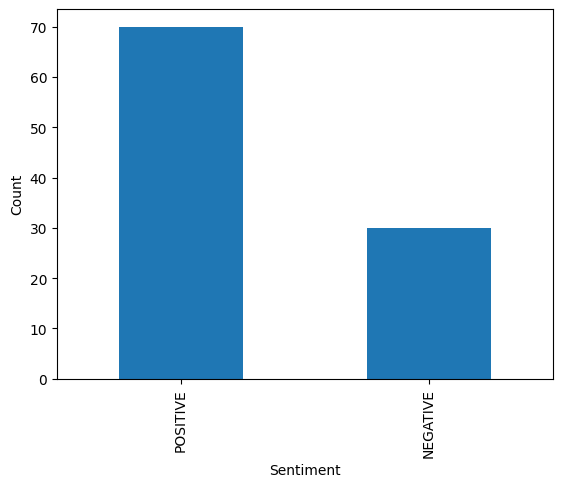

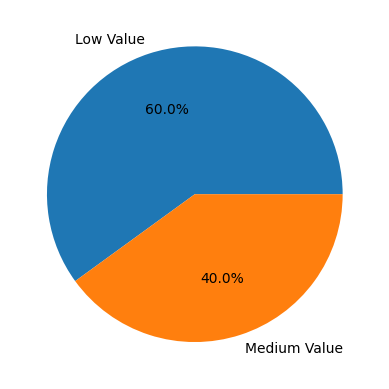

In [14]:
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns

# Title of the dashboard
st.title("Customer Feedback Analysis Dashboard")

# Sentiment Distribution Plot
sentiment_counts = data['Sentiment'].value_counts()

# Plot sentiment distribution
st.subheader('Sentiment Distribution')
fig, ax = plt.subplots()
sentiment_counts.plot(kind='bar', ax=ax)
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
st.pyplot(fig)

# Customer Categories Plot
category_counts = data['Customer_Category'].value_counts()

# Plot customer categories
st.subheader('Customer Category Distribution')
fig2, ax2 = plt.subplots()
category_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%')
ax2.set_ylabel('')
st.pyplot(fig2)

# Show DataFrame with Alerts
st.subheader('Customer Alerts')
alerts_df = pd.read_excel('customer_alerts.xlsx')
st.dataframe(alerts_df)
